In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import re

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/model/Çevirili_Transcript_Therapist_Client_Utterance_Pairs (1).xlsx')
data.head()

,Transcript ID,Therapist Utterance,terapist_ifade,Client Utterance,Danisan_ifade,Client Talk Type,Client Timestamp,voice_file_stamp
0,0,0: Thanks for filling it out. We give this for...,0: Formu doldurduğunuz için teşekkürler. Bu fo...,1: Sure.,1: Elbette.,neutral,00:00:24,transcript_id ve utterance_id
1,0,"2: So, let's see. It looks that you put-- You ...",2: Hadi bakalım. Görünüşe göre sen-- Haftada o...,3: Mm-hmm.,3: Hı-hı.,neutral,00:00:34,transcript_id ve utterance_id
2,0,4: nan,4:nan,5: Usually three drinks and glasses of wine.,5: Genellikle üç içki ve bir kadeh şarap.,neutral,00:00:39,transcript_id ve utterance_id
3,0,6: Okay. That's at least 12 drinks a week.,6: Tamam. Bu haftada en az 12 içki eder.,7: Something like that.,7: Buna benzer bir şey.,neutral,00:00:46,transcript_id ve utterance_id
4,0,"8: Okay. Just so you know, my role, um, when w...","8: Tamam. Bilmenizi isterim ki, alkol kullanım...",9: Okay.,9: Tamam.,neutral,00:01:03,transcript_id ve utterance_id


In [ ]:
data_1 = data[["terapist_ifade","Danisan_ifade","Client Talk Type"]]
data_1

,terapist_ifade,Danisan_ifade,Client Talk Type
0,0: Formu doldurduğunuz için teşekkürler. Bu fo...,1: Elbette.,neutral
1,2: Hadi bakalım. Görünüşe göre sen-- Haftada o...,3: Hı-hı.,neutral
2,4:nan,5: Genellikle üç içki ve bir kadeh şarap.,neutral
3,6: Tamam. Bu haftada en az 12 içki eder.,7: Buna benzer bir şey.,neutral
4,"8: Tamam. Bilmenizi isterim ki, alkol kullanım...",9: Tamam.,neutral
...,...,...,...
4898,372: Ve bu tek başına yürünecek oldukça yalnız...,373: İşte Fiona.,change
4899,374: Evet.,"375: [anlaşılmaz 00:26:37] dışarı çıkıyor, pe...",change
4900,376: Belki onlar da seninle aynı yolda yürürler.,"377: Evet, tamam, uh, tamam, evet. Tamam.",change
4901,378: Birkaç kişi var.,379: Evet.,change


In [ ]:
# Etiketsiz verilerin görüntülenmesi, bu veriler karşılıklı konuşmadaki son ifadenin terapist tarafından söylenmesinden kaynaklanıyor.

data_1[data_1['Client Talk Type'] == "none"]["Client Talk Type"].value_counts()

,count
Client Talk Type,
none,85


In [ ]:
# etiketsiz satırların silinmesi, ve yeni veri seti
data_2 = data_1[data_1['Client Talk Type'] != "none"]
data_2

,terapist_ifade,Danisan_ifade,Client Talk Type
0,0: Formu doldurduğunuz için teşekkürler. Bu fo...,1: Elbette.,neutral
1,2: Hadi bakalım. Görünüşe göre sen-- Haftada o...,3: Hı-hı.,neutral
2,4:nan,5: Genellikle üç içki ve bir kadeh şarap.,neutral
3,6: Tamam. Bu haftada en az 12 içki eder.,7: Buna benzer bir şey.,neutral
4,"8: Tamam. Bilmenizi isterim ki, alkol kullanım...",9: Tamam.,neutral
...,...,...,...
4897,"370: Yani senin bir parçan var, ben bu işin zo...",371: Hımm.,change
4898,372: Ve bu tek başına yürünecek oldukça yalnız...,373: İşte Fiona.,change
4899,374: Evet.,"375: [anlaşılmaz 00:26:37] dışarı çıkıyor, pe...",change
4900,376: Belki onlar da seninle aynı yolda yürürler.,"377: Evet, tamam, uh, tamam, evet. Tamam.",change


In [ ]:
data_2["Client Talk Type"].value_counts()

,count
Client Talk Type,
neutral,3102
change,1175
sustain,540


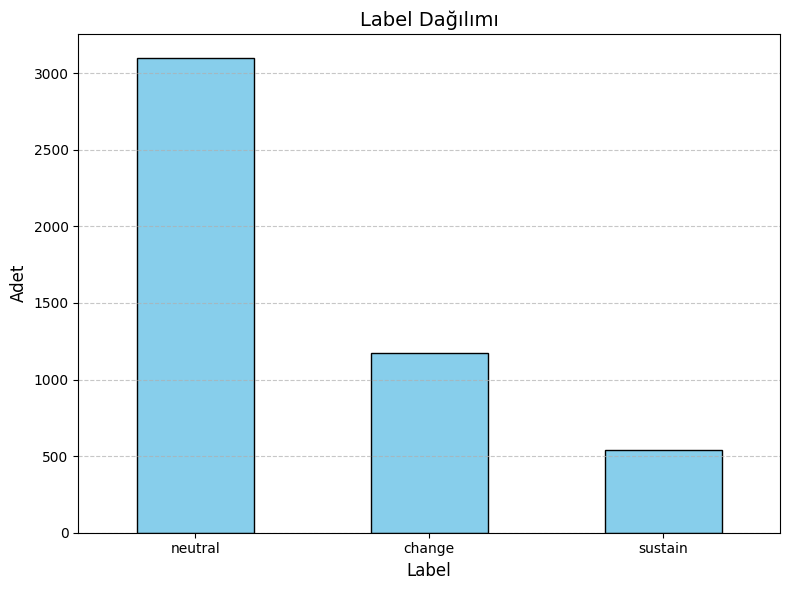

In [ ]:
label_counts = data_2["Client Talk Type"].value_counts()

# Grafik oluşturma
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Label Dağılımı', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Adet', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Sütun isimlerinin daha anlaşılır isimler ile değiştirilmesi

data_2.rename(columns={"terapist_ifade": "terapist", "Danisan_ifade": "danisan", "Client Talk Type":"label"}, inplace=True)
data_2.columns

<ipython-input-9-acd44ecab052>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2.rename(columns={"terapist_ifade": "terapist", "Danisan_ifade": "danisan", "Client Talk Type":"label"}, inplace=True)


Index(['terapist', 'danisan', 'label'], dtype='object')

In [ ]:
def temizle_ifade(metin):
    return re.sub(r'^\d+:\s*', '', metin)


In [ ]:
# Temizleme işlemi
data_2['terapist'] = data_2['terapist'].apply(temizle_ifade)
data_2

<ipython-input-11-96af93767366>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['terapist'] = data_2['terapist'].apply(temizle_ifade)


,terapist,danisan,label
0,Formu doldurduğunuz için teşekkürler. Bu formu...,1: Elbette.,neutral
1,Hadi bakalım. Görünüşe göre sen-- Haftada orta...,3: Hı-hı.,neutral
2,nan,5: Genellikle üç içki ve bir kadeh şarap.,neutral
3,Tamam. Bu haftada en az 12 içki eder.,7: Buna benzer bir şey.,neutral
4,"Tamam. Bilmenizi isterim ki, alkol kullanımınd...",9: Tamam.,neutral
...,...,...,...
4897,"Yani senin bir parçan var, ben bu işin zor old...",371: Hımm.,change
4898,Ve bu tek başına yürünecek oldukça yalnız bir ...,373: İşte Fiona.,change
4899,Evet.,"375: [anlaşılmaz 00:26:37] dışarı çıkıyor, pe...",change
4900,Belki onlar da seninle aynı yolda yürürler.,"377: Evet, tamam, uh, tamam, evet. Tamam.",change


In [ ]:
# Temizleme işlemi
temizlenmis_ifadeler = []
for ifade in data_2['danisan']:
    if isinstance(ifade, str):  # Sadece metin türündeki değerleri işleme al
        # Başlangıçtaki numarayı ve ":" işaretini temizle
        temizlenmis_ifadeler.append(ifade.split(":", 1)[-1].strip())
    else:
        # Eğer ifade None veya başka bir tipteyse olduğu gibi ekle
        temizlenmis_ifadeler.append(ifade)

# Temizlenmiş ifadeleri yeni bir sütuna kaydet
data_2['danisan'] = temizlenmis_ifadeler

<ipython-input-12-370f2af3e39e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['danisan'] = temizlenmis_ifadeler


In [ ]:
data_2

,terapist,danisan,label
0,Formu doldurduğunuz için teşekkürler. Bu formu...,Elbette.,neutral
1,Hadi bakalım. Görünüşe göre sen-- Haftada orta...,Hı-hı.,neutral
2,nan,Genellikle üç içki ve bir kadeh şarap.,neutral
3,Tamam. Bu haftada en az 12 içki eder.,Buna benzer bir şey.,neutral
4,"Tamam. Bilmenizi isterim ki, alkol kullanımınd...",Tamam.,neutral
...,...,...,...
4897,"Yani senin bir parçan var, ben bu işin zor old...",Hımm.,change
4898,Ve bu tek başına yürünecek oldukça yalnız bir ...,İşte Fiona.,change
4899,Evet.,"[anlaşılmaz 00:26:37] dışarı çıkıyor, peki ne ...",change
4900,Belki onlar da seninle aynı yolda yürürler.,"Evet, tamam, uh, tamam, evet. Tamam.",change


In [ ]:
# 'terapist' ve 'danisan' sütununda '[' karakteri içeren satırları filtreleme
data_2[(data_2['terapist'].str.contains(r'\[', na=False)) | (data_2['danisan'].str.contains(r'\[', na=False))]

,terapist,danisan,label
119,Hı-hı.,[boğazını temizler],neutral
123,"Tamam. Peki, ona okuma ve yazmanın senin için ...",Sadece-- Çok dağınık olacağını düşündüğüm için...,neutral
294,Merhaba. Siz [anlaşılmaz 00:00:02] misiniz?,Evet.,neutral
298,"Evet, kesinlikle olabilir.",[iç çeker],neutral
422,Çünkü oranların yaklaşık %25 civarında olduğun...,Şanssız olanlar.,sustain
...,...,...,...
4772,"Hiçbir fikrim yok. Tamam. Merak ediyorum, bir ...",[başını sallıyor].,neutral
4776,Fakat bazıları.,"Hımm, oh, bende var. Evet, bir tane. [kıkırdar]",neutral
4874,"Buradaki diğer yaşam tarzı, aslında düşündüğüm...","Hımm, işte bu kadar heyecan verici görünüyor.",change
4883,"Evet. Biraz şaşırmış gibisin, ben-ben [çapraz ...","Sen-sen -, biz içeride olduğumuzdan beri uzun ...",change


In [ ]:
def temizle_koseli_parantez(metin):
    if isinstance(metin, str):
        return re.sub(r'\[.*?\]', '', metin).strip()
    return metin

# Tüm sütunlar üzerinde köşeli parantezleri temizleme
for column in data_2.columns:
    data_2[column] = data_2[column].apply(temizle_koseli_parantez)


<ipython-input-15-a10294c50839>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2[column] = data_2[column].apply(temizle_koseli_parantez)


In [ ]:
data_2

,terapist,danisan,label
0,Formu doldurduğunuz için teşekkürler. Bu formu...,Elbette.,neutral
1,Hadi bakalım. Görünüşe göre sen-- Haftada orta...,Hı-hı.,neutral
2,nan,Genellikle üç içki ve bir kadeh şarap.,neutral
3,Tamam. Bu haftada en az 12 içki eder.,Buna benzer bir şey.,neutral
4,"Tamam. Bilmenizi isterim ki, alkol kullanımınd...",Tamam.,neutral
...,...,...,...
4897,"Yani senin bir parçan var, ben bu işin zor old...",Hımm.,change
4898,Ve bu tek başına yürünecek oldukça yalnız bir ...,İşte Fiona.,change
4899,Evet.,"dışarı çıkıyor, peki ne yaptı? Şey, baba da ay...",change
4900,Belki onlar da seninle aynı yolda yürürler.,"Evet, tamam, uh, tamam, evet. Tamam.",change


In [ ]:
data_2 = data_2.applymap(lambda x: None if isinstance(x, str) and x.strip() == "" else x)

<ipython-input-17-cd95a313ec9d>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_2 = data_2.applymap(lambda x: None if isinstance(x, str) and x.strip() == "" else x)


In [ ]:
data_2["terapist"] = data_2["terapist"].str.lower()
data_2["danisan"] = data_2["danisan"].str.lower()
data_2["label"] = data_2["label"].str.lower()

data_2

,terapist,danisan,label
0,formu doldurduğunuz için teşekkürler. bu formu...,elbette.,neutral
1,hadi bakalım. görünüşe göre sen-- haftada orta...,hı-hı.,neutral
2,nan,genellikle üç içki ve bir kadeh şarap.,neutral
3,tamam. bu haftada en az 12 içki eder.,buna benzer bir şey.,neutral
4,"tamam. bilmenizi isterim ki, alkol kullanımınd...",tamam.,neutral
...,...,...,...
4897,"yani senin bir parçan var, ben bu işin zor old...",hımm.,change
4898,ve bu tek başına yürünecek oldukça yalnız bir ...,i̇şte fiona.,change
4899,evet.,"dışarı çıkıyor, peki ne yaptı? şey, baba da ay...",change
4900,belki onlar da seninle aynı yolda yürürler.,"evet, tamam, uh, tamam, evet. tamam.",change


In [ ]:
# Türkçe karakterlere uygun temizleme fonksiyonu
def temizle_karakterler(metin):
    if isinstance(metin, str):  # Sadece metinler üzerinde işlem yap
        # Türkçe harfler, rakamlar, boşluk, noktalama işaretleri dışındaki her şeyi sil
        return re.sub(r'[^a-zA-Z0-9çÇşŞğĞüÜöÖıİ\s.,!?]', '', metin)
    return metin  # Diğer durumlarda metni olduğu gibi döndür

In [ ]:
# Temizleme işlemi
data_2['danisan'] = data_2['danisan'].apply(temizle_karakterler)
data_2["terapist"] = data_2["terapist"].apply(temizle_karakterler)
data_2["label"] = data_2["label"].apply(temizle_karakterler)
data_2

,terapist,danisan,label
0,formu doldurduğunuz için teşekkürler. bu formu...,elbette.,neutral
1,hadi bakalım. görünüşe göre sen haftada ortala...,hıhı.,neutral
2,nan,genellikle üç içki ve bir kadeh şarap.,neutral
3,tamam. bu haftada en az 12 içki eder.,buna benzer bir şey.,neutral
4,"tamam. bilmenizi isterim ki, alkol kullanımınd...",tamam.,neutral
...,...,...,...
4897,"yani senin bir parçan var, ben bu işin zor old...",hımm.,change
4898,ve bu tek başına yürünecek oldukça yalnız bir ...,işte fiona.,change
4899,evet.,"dışarı çıkıyor, peki ne yaptı? şey, baba da ay...",change
4900,belki onlar da seninle aynı yolda yürürler.,"evet, tamam, uh, tamam, evet. tamam.",change


In [ ]:
import re

def sayilari_metne_cevir_turkce(metin):
    """
    Metindeki sayıları Türkçe kelimelere çevirir.

    Args:
        metin (str): Sayıları içeren metin.

    Returns:
        str: Sayıları metin olarak çevrilmiş yeni metin.
    """
    # Türkçe sayı isimlendirme fonksiyonları
    def sayi_metne_cevir_turkce(sayi):
        birler = ['', 'bir', 'iki', 'üç', 'dört', 'beş', 'altı', 'yedi', 'sekiz', 'dokuz']
        onlar = ['', 'on', 'yirmi', 'otuz', 'kırk', 'elli', 'altmış', 'yetmiş', 'seksen', 'doksan']
        yuzler_listesi = ['', 'yüz', 'iki yüz', 'üç yüz', 'dört yüz', 'beş yüz', 'altı yüz', 'yedi yüz', 'sekiz yüz', 'dokuz yüz'] # Yüzler için bir liste eklendi

        if sayi == 0:
            return 'sıfır'

        if sayi < 0:
            return f"eksi {sayi_metne_cevir_turkce(abs(sayi))}"

        sonuc = ''
        if sayi >= 100:
            yuzler = sayi // 100
            # Yüzler için yeni listeyi kullan
            if yuzler < len(yuzler_listesi):
                sonuc += yuzler_listesi[yuzler] + ' '
            else:
                # Büyük sayılar için alternatif çözüm (örneğin olduğu gibi bırakma)
                sonuc += str(yuzler) + ' yüz '
            sayi %= 100

        if sayi >= 10:
            onlar_basamak = sayi // 10
            sonuc += onlar[onlar_basamak] + ' '
            sayi %= 10

        if sayi > 0:
            sonuc += birler[sayi]

        return sonuc.strip()

    # Düzenli ifadeyle sayıları bul ve çevir
    def cevir_eslesme(match):
        sayi = int(match.group())
        return sayi_metne_cevir_turkce(sayi)

    # Eğer metin değilse olduğu gibi döndür
    if not isinstance(metin, str):
        return metin

    # Metindeki sayıları çevir ve değiştir
    return re.sub(r'\b\d+\b', cevir_eslesme, metin)

In [ ]:
# sayısal değerleri de metne çevirdik
data_2['danisan'] = data_2['danisan'].apply(sayilari_metne_cevir_turkce)
data_2["terapist"] = data_2["terapist"].apply(sayilari_metne_cevir_turkce)

In [ ]:
data_2

,terapist,danisan,label
0,formu doldurduğunuz için teşekkürler. bu formu...,elbette.,neutral
1,hadi bakalım. görünüşe göre sen haftada ortala...,hıhı.,neutral
2,nan,genellikle üç içki ve bir kadeh şarap.,neutral
3,tamam. bu haftada en az on iki içki eder.,buna benzer bir şey.,neutral
4,"tamam. bilmenizi isterim ki, alkol kullanımınd...",tamam.,neutral
...,...,...,...
4897,"yani senin bir parçan var, ben bu işin zor old...",hımm.,change
4898,ve bu tek başına yürünecek oldukça yalnız bir ...,işte fiona.,change
4899,evet.,"dışarı çıkıyor, peki ne yaptı? şey, baba da ay...",change
4900,belki onlar da seninle aynı yolda yürürler.,"evet, tamam, uh, tamam, evet. tamam.",change


In [ ]:
# karşılıklı boş ifadelerin tespiti ve silinmesi
data_2 = data_2[~(data_2.terapist.isin(["nan", "none"])) | (data_2.danisan.isin(["nan", "none"]))]

In [ ]:
data_2.describe(include='all')

,terapist,danisan,label
count,4712,4710,4716
unique,3558,3395,3
top,hıhı.,evet.,neutral
freq,327,553,3031


In [ ]:
#Boş veri hücreli satırların silinmesi

data_3 = data_2.dropna()
data_3.describe(include='all')

,terapist,danisan,label
count,4704,4704,4704
unique,3552,3392,3
top,hıhı.,evet.,neutral
freq,326,551,3021


In [ ]:
# BERT girdisine uygun sep ayracı. iki ifade kaynağını birbirinden ayırmak için
data_3['terapist_danisan'] = data_3['terapist'] + ' [SEP] ' + data_3['danisan']
data_3["terapist_danisan"][0]

<ipython-input-27-74cd437c056a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3['terapist_danisan'] = data_3['terapist'] + ' [SEP] ' + data_3['danisan']


'formu doldurduğunuz için teşekkürler. bu formu yılda bir kez, neden geldiklerine bakmaksızın herkese veriyoruz. daha iyi bir takip sağlamamıza yardımcı oluyor. yazdıklarınıza bir göz atabilir miyim? [SEP] elbette.'

In [ ]:
data_3.describe(include='all')

,terapist,danisan,label,terapist_danisan
count,4704,4704,4704,4704
unique,3552,3392,3,4571
top,hıhı.,evet.,neutral,tamam. [SEP] nan
freq,326,551,3021,18


In [ ]:
data_4 = data_3.copy()
data_4.drop(columns=["terapist","danisan"], inplace=True)
data_4

,label,terapist_danisan
0,neutral,formu doldurduğunuz için teşekkürler. bu formu...
1,neutral,hadi bakalım. görünüşe göre sen haftada ortala...
3,neutral,tamam. bu haftada en az on iki içki eder. [SEP...
4,neutral,"tamam. bilmenizi isterim ki, alkol kullanımınd..."
5,neutral,içki içmen hakkında bana başka neler anlatabil...
...,...,...
4897,change,"yani senin bir parçan var, ben bu işin zor old..."
4898,change,ve bu tek başına yürünecek oldukça yalnız bir ...
4899,change,"evet. [SEP] dışarı çıkıyor, peki ne yaptı? şey..."
4900,change,belki onlar da seninle aynı yolda yürürler. [S...


In [ ]:
"""# düzenlenmiş veri
data_4.to_excel("temizlenmis_ifadeler_data_4.xlsx", index=False)"""

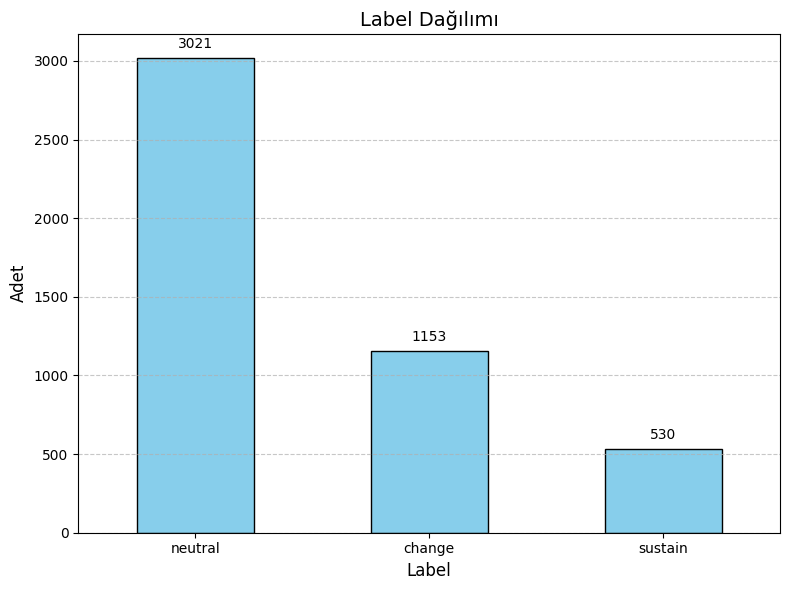

In [ ]:
label_counts = data_4['label'].value_counts()

# Grafik oluşturma
plt.figure(figsize=(8, 6))
ax = label_counts.plot(kind='bar', color='skyblue', edgecolor='black') # Get the axes object
plt.title('Label Dağılımı', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Adet', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Değerleri çubukların üzerine yazdırma
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [ ]:
data_4[data_4["label"].isin(["nan"])]

,label,terapist_danisan


In [ ]:
data_4 = data_4[data_4.label.isna() == False]

In [ ]:
data_4.shape

(4704, 2)

In [ ]:
# Import the necessary function
from sklearn.model_selection import train_test_split

In [ ]:
# 1. Split data
train_texts, remaining_texts, train_labels, remaining_labels = train_test_split(
    data_4["terapist_danisan"],
    data_4["label"],
    test_size=0.3,
    random_state=42
)

val_texts, test_texts, val_labels, test_labels = train_test_split(
    remaining_texts,
    remaining_labels,
    test_size=0.5,
    random_state=42
)

In [ ]:
train_data = pd.DataFrame({
    'text': train_texts,
    'label': train_labels
})

In [ ]:
train_data.label.value_counts()

,count
label,
neutral,2094
change,836
sustain,362


In [ ]:
!pip install googletrans==3.1.0a0

In [ ]:
from googletrans import Translator

def back_translate(text, target_lang='en', source_lang='tr'):
    """
    Metni hedef dile çevirir, ardından tekrar kaynak dile çevirir.

    Args:
        text (str): Çevrilecek metin.
        target_lang (str): Hedef dilin kısaltması (örneğin, 'en' İngilizce için).
        source_lang (str): Kaynak dilin kısaltması (örneğin, 'tr' Türkçe için).

    Returns:
        str: Back-translation sonucu elde edilen metin.
    """
    translator = Translator()
    translated = translator.translate(text, dest=target_lang, src=source_lang).text
    back_translated = translator.translate(translated, dest=source_lang, src=target_lang).text
    return back_translated

In [ ]:
# Azınlık sınıfı için eşik değeri belirleyin (örneğin, 1200)
threshold = 1200

# Eğitim setinde azınlık sınıfındaki verileri filtreleyin
# Get the value counts of the labels
label_counts = train_labels.value_counts()

# Get labels below the threshold
minority_labels = label_counts[label_counts < threshold].index

# Reset index of both train_texts and train_labels to ensure alignment
train_texts = train_texts.reset_index(drop=True)
train_labels = train_labels.reset_index(drop=True)

# Filter train_texts and train_labels based on minority_labels
train_minority_class = train_texts[train_labels.isin(minority_labels)]
train_minority_labels = train_labels[train_labels.isin(minority_labels)]

# Back-translation uygulayın ve yeni verileri oluşturun
augmented_texts = train_minority_class.apply(back_translate) # Sadece metinleri artırın
augmented_labels = train_minority_labels  # Use the correct labels for augmented data

In [ ]:
# Yeni verileri eğitim setine ekleyin
train_texts = pd.concat([train_texts, augmented_texts])
train_labels = pd.concat([train_labels, augmented_labels])

# Check the lengths before creating the DataFrame
print(len(train_texts))
print(len(train_labels))

# Ensure both Series have the same length by trimming the longer one
min_len = min(len(train_texts), len(train_labels))
train_texts = train_texts[:min_len]
train_labels = train_labels[:min_len]

# Dengeli eğitim setini bir pandas DataFrame'ine dönüştürün
balanced_train_df = pd.DataFrame({
    'text': train_texts.tolist(),  # Artırılmış veriler zaten train_texts içinde
    'label': train_labels.tolist()
})

# DataFrame'i bir Excel dosyasına kaydedin
balanced_train_df.to_excel("/content/drive/MyDrive/model/verisetleri/balanced_train_dataset.xlsx", index=False)

4490
4490


In [ ]:
balanced_train_df

,text,label
0,evet. [SEP] onlara ödeme yapmanın bir yolu ve,change
1,mmhmm. yani yardımcı oldu [SEP] evet. kendimi ...,sustain
2,"ve aynı zamanda, geçmişi bırakmak zor, ama öte...",change
3,tamam. [SEP] evet. sanırım bunu yapabilirim. ş...,change
4,"şey, ve biliyorum ki bazı müşteriler özgürlükl...",change
...,...,...
4485,Evet. [SEP] çünkü benim yaşım olarak menopoza ...,sustain
4486,ve uygulamalı konularda gerçekten iyisin ama k...,change
4487,Evet. tamam. Peki ya bu? Alkolün orada olduğu ...,sustain
4488,Sizce bundan sonra nereye gitmeliyiz? [EYLÜL] ...,change


In [ ]:
balanced_train_df.label.value_counts()

,count
label,
neutral,2094
change,1672
sustain,724


In [ ]:
# Azınlık sınıfı için eşik değeri belirleyin (örneğin, 1200)
threshold = 800

# Eğitim setinde azınlık sınıfındaki verileri filtreleyin
# Get the value counts of the labels
label_counts = train_labels.value_counts()

# Get labels below the threshold
minority_labels = label_counts[label_counts < threshold].index

# Reset index of both train_texts and train_labels to ensure alignment
train_texts = train_texts.reset_index(drop=True)
train_labels = train_labels.reset_index(drop=True)

# Filter train_texts and train_labels based on minority_labels
train_minority_class = train_texts[train_labels.isin(minority_labels)]
train_minority_labels = train_labels[train_labels.isin(minority_labels)]

# Back-translation uygulayın ve yeni verileri oluşturun
augmented_texts = train_minority_class.apply(back_translate) # Sadece metinleri artırın
augmented_labels = train_minority_labels  # Use the correct labels for augmented data

In [ ]:
# Yeni verileri eğitim setine ekleyin
train_texts = pd.concat([train_texts, augmented_texts])
train_labels = pd.concat([train_labels, augmented_labels])

# Check the lengths before creating the DataFrame
print(len(train_texts))
print(len(train_labels))

# Ensure both Series have the same length by trimming the longer one
min_len = min(len(train_texts), len(train_labels))
train_texts = train_texts[:min_len]
train_labels = train_labels[:min_len]

# Dengeli eğitim setini bir pandas DataFrame'ine dönüştürün
balanced_train_df = pd.DataFrame({
    'text': train_texts.tolist(),  # Artırılmış veriler zaten train_texts içinde
    'label': train_labels.tolist()
})

# DataFrame'i bir Excel dosyasına kaydedin
balanced_train_df.to_excel("/content/drive/MyDrive/model/verisetleri/balanced_train_dataset.xlsx", index=False)

5214
5214


In [ ]:
balanced_train_df

,text,label
0,evet. [SEP] onlara ödeme yapmanın bir yolu ve,change
1,mmhmm. yani yardımcı oldu [SEP] evet. kendimi ...,sustain
2,"ve aynı zamanda, geçmişi bırakmak zor, ama öte...",change
3,tamam. [SEP] evet. sanırım bunu yapabilirim. ş...,change
4,"şey, ve biliyorum ki bazı müşteriler özgürlükl...",change
...,...,...
5209,Tamam. Bu seni hiç ilgilendiriyor mu? [SEP] ya...,sustain
5210,"Tamam. [SEP], bir gecede veya bir haftada yapa...",sustain
5211,"Sen yıldız bir oyuncusun, seni kim eleştirecek...",sustain
5212,Evet. [SEP] çünkü benim yaşım olduğundan menop...,sustain


In [ ]:
balanced_train_df.label.value_counts()

,count
label,
neutral,2094
change,1672
sustain,1448


In [ ]:
# balanced_train_df DataFrame'inde 'text' sütununda '[SEP]' ifadesini içermeyen satırları seçin
balanced_train_df[~balanced_train_df['text'].str.contains('\[SEP]', regex=True)]

,text,label
3295,Tamam. [EYLÜL] evet. Bunu yapabileceğimi düşün...,change
3306,Hmm. Ayrıca artık başını belaya sokmak istemed...,change
3311,"Hmm. [EYLÜL] mm. Beni şaşırtıyor, iz, bir şeyi...",change
3315,"evet, evet, tamam, tamam. Yani Sarah bunu bir ...",change
3319,"Biraz geniş kapsamlı, sanki her şeyi değiştirm...",sustain
...,...,...
5177,Vikinglerin oyunundan hayal kırıklığına uğradı...,sustain
5179,"Aile barını biliyorum, evet. [EYLÜL] evet. Bu ...",sustain
5184,Ben sağlık planınızın vaka yöneticisiyim. Bugü...,sustain
5197,Ama yine de oldukça berbat bir programın devam...,sustain


In [ ]:
# 'text' sütununda '[EYLÜL]' ifadesini '[SEP]' ile değiştirme
balanced_train_df['text'] = balanced_train_df['text'].str.replace('\[EYLÜL]', '[SEP]', regex=True)

In [ ]:
balanced_train_df[~balanced_train_df['text'].str.contains('\[SEP]', regex=True)]

,text,label
4191,Peki bu şu anda sizin için nasıl bir duygu? [S...,sustain
4253,"Eğer bu çok fazlaysa, o zaman [SEP'in] amacını...",change
4753,Peki bu şu anda sizin için nasıl bir duygu? [S...,sustain
5114,Evet. [STEP] kızım beni sık sık ziyaret edemiy...,sustain
5115,Peki bu şu anda sizin için nasıl bir duygu? [S...,sustain


In [ ]:
balanced_train_df.text[5115]

'Peki bu şu anda sizin için nasıl bir duygu? [SEP] çünkü sanki kendimde bir şeyler bulmuşum ya da bir şeyler eksikmiş gibi.'

In [ ]:
balanced_train_df['text'] = balanced_train_df['text'].str.replace('\[SEPT]', '[SEP]', regex=True)

In [ ]:
balanced_train_df['text'] = balanced_train_df['text'].str.replace(r'\[SEP\'in\]', '[SEP]', regex=True)

In [ ]:
balanced_train_df['text'] = balanced_train_df['text'].str.replace(r'\[STEP]', '[SEP]', regex=True)

In [ ]:
balanced_train_df.label.value_counts()

,count
label,
neutral,2094
change,1672
sustain,1448


In [ ]:
# DataFrame'i bir Excel dosyasına kaydedin
balanced_train_df.to_excel("/content/drive/MyDrive/model/verisetleri/balanced_train_dataset.xlsx", index=False)

In [ ]:
# Doğrulama setini bir pandas DataFrame'ine dönüştürün
val_df = pd.DataFrame({
    'text': val_texts.tolist(),
    'label': val_labels.tolist()
})

# DataFrame'i bir Excel dosyasına kaydedin
val_df.to_excel("/content/drive/MyDrive/model/verisetleri/val_dataset.xlsx", index=False)

# Veya bir CSV dosyasına kaydedin
# val_df.to_csv("val_dataset.csv", index=False)


# Test setini bir pandas DataFrame'ine dönüştürün
test_df = pd.DataFrame({
    'text': test_texts.tolist(),
    'label': test_labels.tolist()
})

# DataFrame'i bir Excel dosyasına kaydedin
test_df.to_excel("/content/drive/MyDrive/model/verisetleri/test_dataset.xlsx", index=False)


In [ ]:
print(val_df.shape)
print(test_df.shape)


(706, 2)
(706, 2)


In [ ]:
val_df.head()

,text,label
0,evet. [SEP] o ragbi ve kriket aslında aynıydı.,neutral
1,"ve böylece, bunu yapmamak sizin için daha kola...",neutral
2,"hayır, hayır. bu kolay olacak. peki senin için...",change
3,"ve bu biraz korkutucu. [SEP] aman tanrım, evet...",neutral
4,ve ayrıca içtiğinizde bazen bazı şeyleri unutt...,neutral


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 20.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
# Hugging Face Dataset formatına çevirin
from datasets import Dataset

label_mapping = {"change": 0, "sustain": 1, "neutral": 2}

# Convert 'text' column to string type, and 'label' column to string type before creating the dataset
train_dataset = Dataset.from_dict({"text": train_texts.astype(str),
                                   "label": train_labels.map(label_mapping).astype(int)})

# Replace NaN or infinite values with a default value (e.g., -1) before converting to int
val_labels_cleaned = val_labels.map(label_mapping).fillna(-1).astype(int)
val_dataset = Dataset.from_dict({"text": val_texts.astype(str),
                                 "label": val_labels_cleaned})

# Replace NaN or infinite values with a default value (e.g., -1) before converting to int
test_labels_cleaned = test_labels.map(label_mapping).fillna(-1).astype(int)
test_dataset = Dataset.from_dict({"text": test_texts.astype(str),
                                  "label": test_labels_cleaned})

In [ ]:
train_dataset[:5] # Hugging Face Datasets use slicing to view the first few rows

{'text': ['evet. [SEP] onlara ödeme yapmanın bir yolu ve',
  'mmhmm. yani yardımcı oldu [SEP] evet. kendimi yalnız hissediyorum ve onu özlüyorum ve bu yardımcı oluyor ama...',
  've aynı zamanda, geçmişi bırakmak zor, ama öte yandan, başka seçeneğim yok. bu şekilde görünmeliyim. diye düşünüyorsun. hissettiğim şey bu mu? [SEP] sanırım öyle. sanki zaten bir seçim yapmışım ve bununla ilgili bazı kötü seçimler yapmışım gibi hissediyorum.',
  'tamam. [SEP] evet. sanırım bunu yapabilirim. şey, büyük yan etkiler olmadığı sürece, ama, şey',
  'şey, ve biliyorum ki bazı müşteriler özgürlüklerine gerçekten değer verdiklerini ifade ettiler. bunu ne kadar değerli bulduklarını, özgürlükleri gidene kadar fark etmediler. [SEP] evet, sanırım şu anda keşke sahip olsaydım dediğim tek şey bu.'],
 'label': [0, 1, 0, 0, 0]}

In [ ]:
val_dataset.head()

In [ ]:
test_dataset.head()